## Final project

Rocket League (videogame) AI bot using machine learning and reinforcement learning in the training environment.

In [7]:
import numpy as np
from scipy.optimize import newton as scnewton, bisect, fsolve, root
import sympy as sp
from sympy import diff
from sympy.abc import x
from sympy import lambdify
import random
import math
import matplotlib.pyplot as plt

## Exercise 1: Optimization

Implement the gradient descent algorithm to find the minimum of the following
function:
𝑓(𝑥) = 𝑥^2 + 4𝑥 + 5
1. Define a Python function to compute the value of f(x) and its derivative f′(x).
2. Implement gradient descent starting from an initial value x0=1 and a learning rate α=0.1.
3. Perform at least 20 iterations and show how the value of x converges to the minimum.
4. Plot the function f(x) and the points obtained in each iteration to visualize the convergence.


In [ ]:
# define function and symbols
x = sp.symbols('x')
f = lambda x: x**2 + 2*x + 1
f_symbolic = x**2 + 2 * x + 1

# get dervative
# df = 2x + 4
df_s = diff(f_symbolic, x)
df = lambdify(x, df_s, 'numpy')

#get second derivative
# ddf = 2
ddf_s = diff(diff(f_symbolic, x))
ddf = lambdify(x, ddf_s, 'numpy')

In [ ]:
def gradient_descent(grad, start_x, learning_rate, num_iterations):
    x_value = start_x
    history = [x_value] # define a history of values per iteration

    for i in range(num_iterations):
        grad_value = grad(x_value)  #get gradient in x
        x_value = x_value - learning_rate * grad_value  #update x
        history.append(x_value) #add current x value to history

        #print update every 10 iterations
        if i % 10 == 0:
            print(f"Iteración {i}: x = {x_value}, gradiente = {grad_value}")

    return x_value, history

In [ ]:
#parameters
start_x = 1  #initial x
learning_rate = 0.1  #learning rate
num_iterations = 50  #times the method will iterate

minimum_x, history = gradient_descent(df, start_x, learning_rate, num_iterations)

print(f"\nValor de x que minimiza f(x): {minimum_x}")
print(f"Valor mínimo de f(x): {f(minimum_x)}")

Iteración 0: x = 0.6, gradiente = 4
Iteración 10: x = -0.82820130816, gradiente = 0.42949672959999985
Iteración 20: x = -0.9815532559262905, gradiente = 0.046116860184273856
Iteración 30: x = -0.9980192959371434, gradiente = 0.004951760157141383
Iteración 40: x = -0.9997873235206745, gradiente = 0.0005316911983137551

Valor de x que minimiza f(x): -0.9999714550461459
Valor mínimo de f(x): 8.14814438143685e-10


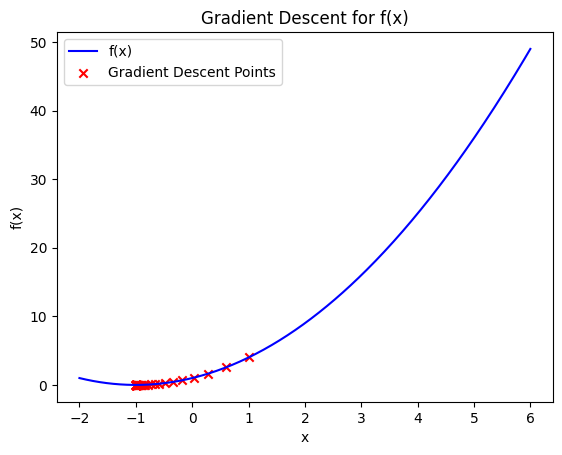

In [ ]:
# Plotting the function and the gradient descent path
x_vals = np.linspace(-2, 6, 400)  # range for plotting the function
y_vals = f(x_vals)  # compute function values
plt.plot(x_vals, y_vals, label="f(x)", color='blue')

# Plot the points from each gradient descent iteration
history_vals = [f(x) for x in history]  # get function values at the points in history
plt.scatter(history, history_vals, color='red', marker='x', label="Gradient Descent Points")

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title("Gradient Descent for f(x)")

# Show the plot
plt.show()

## Exercise 2: Knowledge Based System

* You will implement a knowledge-based system in Python to
solve the three cases.

* The system must take as input a set of facts and logical rules to determine whether the defendant is guilty or innocent.

* You will then extend the system to allow for an appeal, where new evidence can be added and the system updates its verdict.

* You will need to explain in a comment or accompanying document what formalism you used to address the problem (e.g. propositional logic, first-order logic, production rules, etc.) and why you chose it.

* The code should be well commented and organized

**Case 1: The Mansion Murder**

*Crime Description:*
- Crime: Murder of the owner of a mansion.
- Accused: The butler.
- Reason for Guilt:
  * The butler was seen near the crime scene.
  * A knife with his fingerprints was found.
  * The butler had a debt with the victim.
- Initial Verdict: Guilty.

*Appeal*:
- New Evidence:
  * A security video shows the butler was in another room at the time of the crime.
  * The fingerprints on the knife do not match the butler’s.
- Expected Result: Innocent.

In [ ]:
# Base de conocimientos inicial
hechos = {
    "en_escena": True, # lo vieron cerca de la escena
    "huellas_en_arma": True, # encontraron sus huellas en un arma
    "motivo": True, # tenía una deuda pendiente
    "coartada": False,  # no tenía coartada
}

# Regla deductiva
def es_culpable(hechos):
    if hechos["en_escena"] and hechos["huellas_en_arma"] and hechos["motivo"] and not hechos["coartada"]:
        return "Culpable"
    else:
        return "No culpable"

# Conclusión inicial
print("Conclusión inicial:", es_culpable(hechos))

Conclusión inicial: Culpable


In [ ]:
# Nueva información: Coartada verificada
hechos["coartada"] = True   # las cámaras lo mostraron en otra habitación
hechos["huellas_en_arma"] = False # las huellas no eran suyas

# Conclusión revisada
print("Conclusión revisada:", es_culpable(hechos))

Conclusión revisada: No culpable


**Case 2: The Bank Heist**

*Crime Description:*
- Crime: Bank robbery with hostages.
- Accused: A former bank employee.
- Reason for Guilt:
  * The accused was recently fired and had access to the bank’s blueprints.
  * A witness saw him near the bank on the day of the robbery.
  * Stolen money was found in his house.
- Initial Verdict: Guilty.

*Appeal:*
- New Evidence:
  * The witness admits they were mistaken and were not sure they saw the accused.
  * The money found in his house came from a recent inheritance, not the robbery.
- Expected Result: Innocent

In [ ]:
# Base de conocimientos inicial
hechos = {
    "acceso_planos": True, # tenía acceso a los planos
    "en_escena": True,  # lo vieron en escena
    "motivo": True, # recientemente despedido
    "evidencia": True, # la evidencia estaba en su casa
}

# Regla deductiva
def es_culpable(hechos):
    if hechos["acceso_planos"] and hechos["en_escena"] and hechos["motivo"] and hechos["evidencia"]:
        return "Culpable"
    else:
        return "No culpable"

# Conclusión inicial
print("Conclusión inicial:", es_culpable(hechos))

Conclusión inicial: Culpable


In [ ]:
# Nueva información: Coartada verificada
hechos["evidencia"] = True # la evidencia resultó no ser de la escena
hechos["en_escena"] = False # el testigo admitión no haberlo reconocido

# Conclusión revisada
print("Conclusión revisada:", es_culpable(hechos))

Conclusión revisada: No culpable


**Case 3: The Traffic Accident**

*Crime Description:*
- Crime: A traffic accident resulting in the death of a pedestrian.
- Accused: Car driver.
- Reason for Guilt:
  * Driver was speeding.
  * A witness claims the driver ran a red light.
  * Driver had alcohol in their blood.
- Initial Verdict: Guilty.

*Appeal:*
- New Evidence:
  * A traffic light analysis shows it was green at the time of the accident.
  * The driver’s blood alcohol level was within the legal limit.
- Expected Result: Innocent

In [ ]:
# Base de conocimientos inicial
hechos = {
    "velocidad": True, # el conductor iba a exceso de velocidad
    "pasar_luz_roja": True,  # el conductor se pasó una luz roja
    "alcohol": True, # el conductor tenía alcohol en la sangre
}

# Regla deductiva
def es_culpable(hechos):
    if hechos["velocidad"] and hechos["pasar_luz_roja"] and hechos["alcohol"]:
        return "Culpable"
    else:
        return "No culpable"

# Conclusión inicial
print("Conclusión inicial:", es_culpable(hechos))

Conclusión inicial: Culpable


In [ ]:
# Nueva información: Coartada verificada
hechos["pasar_luz_roja"] = False # la luz seguía en verde
hechos["alcohol"] = False # el límite legal de alcohol no fue superado

# Conclusión revisada
print("Conclusión revisada:", es_culpable(hechos))

Conclusión revisada: No culpable


## Exercise 3: Bayesian for emotion detection in text



In [11]:
# Definir varioables de las emociones
joy = "joy"
sadness = "sadness"
fury = "fury"
fear = "fear"

# Sample data (message, emotion)
data = [
    # Alegría (Joy)
    ("I feel on top of the world today!", joy),
    ("What a wonderful day! Everything is perfect.", joy),
    ("I can't stop smiling, this is amazing!", joy),
    ("I am so grateful for this moment!", joy),
    ("This is the happiest day of my life!", joy),
    ("Everything is just falling into place, it's such a great feeling.", joy),
    ("I love the energy I'm surrounded by right now!", joy),
    ("Today has been so full of surprises, I'm so happy!", joy),
    ("The world feels like a better place when you're in a good mood.", joy),
    ("I feel so alive and full of energy!", joy),

    # Tristeza (Sadness)
    ("I feel so down, everything seems so bleak.", sadness),
    ("I'm just not happy anymore.", sadness),
    ("Everything is going wrong, and I feel so alone.", sadness),
    ("I can't seem to shake off this sadness.", sadness),
    ("I feel completely hopeless.", sadness),
    ("I don't know why, but I'm feeling so empty inside.", sadness),
    ("It's hard to find a reason to smile these days.", sadness),
    ("All I want to do is curl up in bed and forget everything.", sadness),
    ("I just feel like nothing matters anymore.", sadness),
    ("Why does it always feel like I'm stuck in a storm?", sadness),

    # Furia (Fury)
    ("I am so furious with how things turned out!", fury),
    ("This is absolutely infuriating, I can't take it!", fury),
    ("Why does everything have to be so frustrating?!", fury),
    ("I am so angry right now, I just want to scream!", fury),
    ("It's so unfair! I can't stand this anymore!", fury),
    ("I can't believe this is happening, I'm livid!", fury),
    ("I'm boiling with rage over this situation!", fury),
    ("Why does this always happen to me? It's maddening!", fury),
    ("I'm furious and I don't know how to deal with it!", fury),
    ("How can people be so inconsiderate? It drives me crazy!", fury),

    # Miedo (Fear)
    ("I am terrified, I don't know what to do!", fear),
    ("This place gives me chills, I'm really scared.", fear),
    ("I have a horrible feeling something bad is going to happen.", fear),
    ("I can't stop worrying, I feel so anxious.", fear),
    ("The thought of it terrifies me.", fear),
    ("I can't shake the feeling that something is wrong.", fear),
    ("I feel like I'm in danger, I can't relax.", fear),
    ("I'm afraid to even close my eyes, the fear is overwhelming.", fear),
    ("What if something happens? I can't stop feeling nervous.", fear),
    ("I feel like I'm on edge, waiting for something bad to happen.", fear)
]

In [12]:
# Mantener las palabras y eliminar puntuación
def preprocess(text):
    text = text.lower()
    text = ''.join(char for char in text if char.isalpha() or char.isspace())  # Mantener letras y espacios
    return text.split()  # Separar en palabras

In [13]:
# Obtener la frecuencia de una emoción por palabra
word_counts = {}
emotion_counts = {}

for message, emotion in data:
    words = preprocess(message)

    # Contar ocurrencias de una emoción
    if emotion not in emotion_counts:
        emotion_counts[emotion] = 0
    emotion_counts[emotion] += 1

    # Contar ocurrencias de una emoción por palabra
    if emotion not in word_counts:
        word_counts[emotion] = {}

    # Contar ocurrencias de una palabra
    for word in words:
        if word not in word_counts[emotion]:
            word_counts[emotion][word] = 0
        word_counts[emotion][word] += 1

In [14]:
### Applying Bayesian theorem

# P(E)
total_messages = sum(emotion_counts.values())
prior_probabilities = {emotion: count / total_messages for emotion, count in emotion_counts.items()}

# P(W|E)
word_probabilities = {}
vocab_size = len(set(word for words in word_counts.values() for word in words))

for emotion, word_dict in word_counts.items():
    total_words_in_emotion = sum(word_dict.values())
    word_probabilities[emotion] = {}
    for word, count in word_dict.items():
        word_probabilities[emotion][word] = (count + 1) / (total_words_in_emotion + vocab_size)

In [15]:
# Clasificar mensaje nuevo usando el teorema de Bayes
def classify_message(message):
    words = preprocess(message)
    emotion_scores = {}

    for emotion in emotion_counts:
        score = math.log(prior_probabilities[emotion])
        for word in words:
            # Si la palabra no ha aparecido, la probabilidad será pequeña
            word_probability = word_probabilities[emotion].get(word, 1 / (sum(word_counts[emotion].values()) + vocab_size))
            score += math.log(word_probability)
        emotion_scores[emotion] = score

    # Regresar la emoción con la mayor probabilidad
    return max(emotion_scores, key=emotion_scores.get)

In [18]:
### Programa I/O

test_message = input("Enter a message to classify its emotion: ")
predicted_emotion = classify_message(test_message)
print(f"The predicted emotion is: {predicted_emotion}")

Enter a message to classify its emotion: what a horrible day, the worst
The predicted emotion is: joy


## Exercise 4: Fuzzy logic for Smart Home Lighting Control

**Problem Description:**

Develop a system that adjusts the lighting in a smart home based on the time of day and the o
ccupancy of the rooms using fuzzy logic. The goal is to maintain optimal lighting conditions for
comfort and energy efficiency.

Requirements:
1. Sensors:
  * Sensors that detect the time of day and the occupancy status of each room (e.g., motion sensors).
2. Fuzzy Control System:
  * Implement a fuzzy control system to adjust the lighting intensity based on the inputs from the sensors.
3. User Input:
  * The system should allow the user to set their preferred lighting levels for different times of the day (morning, afternoon, evening, night).
4. System Output:
  * The system should automatically adjust the lighting intensity in each room according to the occupancy and time of day.

Steps to Follow:
1. Define Fuzzy Variables:
  * Inputs: Time of day (Morning, Afternoon, Evening, Night) and Occupancy (Unoccupied, Occupied).
  * Output: Lighting Intensity (Off, Low, Medium, High).
2. Define Fuzzy Rules:
  * Examples of rules:
    - If the time of day is Morning and the room is Occupied, then the lighting intensity is Medium.
    - If the time of day is Evening and the room is Occupied, then the lighting intensity is High.
    - If the time of day is Night and the room is Unoccupied, then the lighting intensity is OƯ.
3. Implement the Fuzzy Control System:
  * Use a fuzzy logic library like skfuzzy in Python to create the control system.
4. User Interface:
  * Create an interface that allows the user to set their preferred lighting levels and monitor the system's adjustments.
5. Handling Possible Errors:
  * Consider and manage cases where sensor data may be missing or incorrect.

Example Information:

Sensors Data:
* Time of Day: 7 AM, 12 PM, 6 PM, 10 PM
* Occupancy Status: 0 (Unoccupied), 1 (Occupied)

User Preferences:
* Morning (6 AM - 12 PM): Medium lighting
* Afternoon (12 PM - 6 PM): Low lighting
* Evening (6 PM - 9 PM): High lighting
* Night (9 PM - 6 AM): Off

Fuzzy Variables:
* Input Variables:
  - Time of Day: Morning, Afternoon, Evening, Night
  - Occupancy: Unoccupied, Occupied
* Output Variables:
  - Lighting Intensity: Off, Low, Medium, High

Fuzzy Rules:
* If the time of day is Morning and the room is Occupied, then the lighting intensity is Medium.
* If the time of day is Afternoon and the room is Occupied, then the lighting intensity is Low.
* If the time of day is Evening and the room is Occupied, then the lighting intensity is High.
* If the time of day is Night and the room is Unoccupied, then the lighting intensity is Off.

Example Data for Implementation:
* Time of Day: 7 AM, 1 PM, 7 PM, 11 PM
* Occupancy: 1, 0, 1, 0

Output:
* For 7 AM, Occupied: Medium lighting
* For 1 PM, Unoccupied: Low lighting
* For 7 PM, Occupied: High lighting
* For 11 PM, Unoccupied: Off

In [ ]:
!pip install numpy scikit-fuzzy matplotlib

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
# Definición de las variables de entrada y salida
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')
occupancy = ctrl.Antecedent(np.arange(0, 2, 1), 'occupancy')

# Definición de las funciones de membresía para la hora del día
time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [0, 6, 12])
time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [6, 12, 18])
time_of_day['evening'] = fuzz.trimf(time_of_day.universe, [12, 18, 21])
time_of_day['night'] = fuzz.trimf(time_of_day.universe, [18, 24, 24])

# Definición de las funciones de membresía para la ocupación
occupancy['unoccupied'] = fuzz.trimf(occupancy.universe, [0, 0, 1])
occupancy['occupied'] = fuzz.trimf(occupancy.universe, [0, 1, 1])

# Definición de la variable de salida (intensidad de la luz)
lighting_intensity = ctrl.Consequent(np.arange(0, 11, 1), 'lighting_intensity')
lighting_intensity['off'] = fuzz.trimf(lighting_intensity.universe, [0, 0, 3])
lighting_intensity['low'] = fuzz.trimf(lighting_intensity.universe, [0, 3, 5])
lighting_intensity['medium'] = fuzz.trimf(lighting_intensity.universe, [3, 5, 8])
lighting_intensity['high'] = fuzz.trimf(lighting_intensity.universe, [5, 8, 10])

# Definición de las reglas difusas
rule1 = ctrl.Rule(time_of_day['morning'] & occupancy['occupied'], lighting_intensity['medium'])
rule2 = ctrl.Rule(time_of_day['afternoon'] & occupancy['occupied'], lighting_intensity['low'])
rule3 = ctrl.Rule(time_of_day['evening'] & occupancy['occupied'], lighting_intensity['high'])
rule4 = ctrl.Rule(time_of_day['night'] & occupancy['unoccupied'], lighting_intensity['off'])
rule5 = ctrl.Rule(time_of_day['night'] & occupancy['occupied'], lighting_intensity['low'])

# Sistema de control difuso
lighting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
lighting = ctrl.ControlSystemSimulation(lighting_ctrl)

In [ ]:
def adjust_lighting(time, occupancy_status):
    # Valores de entrada
    lighting.input['time_of_day'] = time
    lighting.input['occupancy'] = occupancy_status

    # Calcular la salida
    lighting.compute()

    # Obtener la intensidad de la
    intensity = lighting.output['lighting_intensity']
    return intensity

# Mapear la intensidad de la luz
def map_lighting_to_string(lighting_value):
    if lighting_value is None:
        return "N/A"
    if int(lighting_value) < 3:
        return "Off"
    elif 3 <= int(lighting_value) < 5:
        return "Low"
    elif 5 <= int(lighting_value) < 8:
        return "Medium"
    else:
        return "High"

In [ ]:
def main():
    # Estado inicial de ocupación}
    occupancy_status = 0

    while True:
        # Simulación de un día
        for time in range(24):
            lighting_val = adjust_lighting(time, occupancy_status)

            # Mostrar el resultado solo si el usuario lo pide
            show_light = input(f"Hora {time}: ¿Quieres ver el estado de la luz? (s/n): ").lower()
            if show_light == 's':
                lighting_out = map_lighting_to_string(lighting_val)
                print(f"Nivel de iluminación: {lighting_out}")

        # Preguntar por cambio en la ocupación
        change_occupancy = input("¿Deseas cambiar el estado de ocupación? (s/n): ").lower()
        if change_occupancy == 's':
            # Cambiar el estado de ocupación
            new_occupancy = input("Introduce el nuevo estado de ocupación (0 = No ocupado, 1 = Ocupado): ")
            if new_occupancy == '1' or new_occupancy == '0':
                occupancy_status = int(new_occupancy)
            else:
                print("Error en la entrada, la ocupación no se cambió.")

        # Preguntar si el usuario desea continuar simulando el día
        again = input("¿Quieres simular otro día? (s/n): ").lower()
        if again != 's':
            break

# Iniciar la interacción con el usuario
main()

KeyError: 'lighting_intensity'

Intensidad de la luz: 4.71
Nivel de iluminación: Low



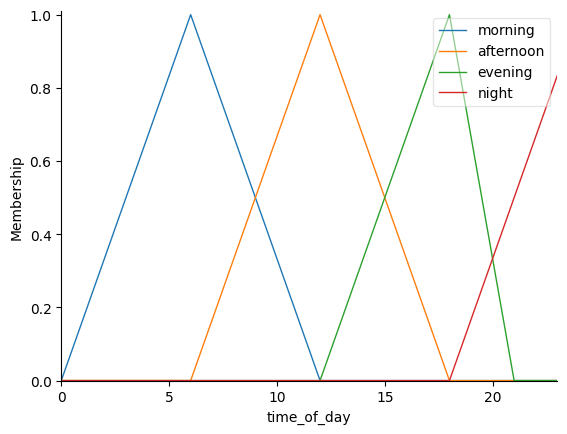

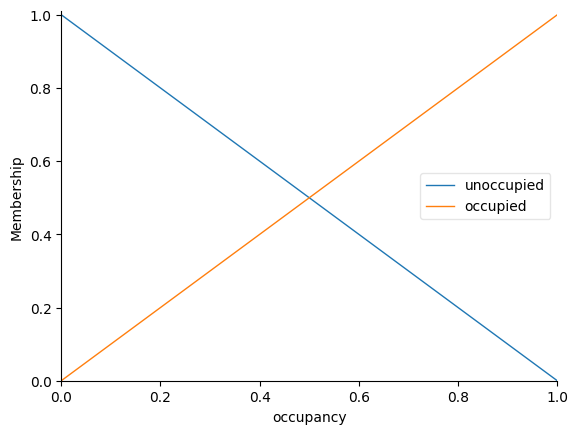

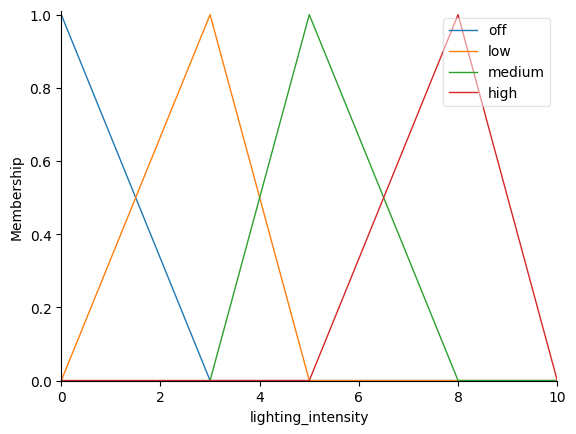

In [ ]:
# Simulación de entrada
lighting.input['time_of_day'] = 7  # Hora del día: 7 AM
lighting.input['occupancy'] = 1    # Estado de ocupación: 1 (Ocupado)

# Calcular la intensidad de la luz
lighting.compute()

# Resultados
lighting_val = lighting.output['lighting_intensity']
print(f"Intensidad de la luz: {lighting_val:.2f}")

# Mostrar la categoría de la intensidad de la luz
lighting_out = map_lighting_to_string(lighting_val)
print(f"Nivel de iluminación: {lighting_out}")
print()

# Gráficas
time_of_day.view()
occupancy.view()
lighting_intensity.view()
plt.show()